Note:
---

The curse of dimensionality basically means that the error increases with the increase in the number of features

Dimensionality reduction is a method of converting the high dimensional variables into lower dimensional variables without changing the specific information of the variables. To overcome the issue of the curse of dimensionality, Dimensionality Reduction is used to reduce the feature space with consideration by a set of principal features. Dimensionality Reduction contains no extra variables that make the data analyzing easier and simple for machine learning algorithms and resulting in a faster outcome from the algorithms.

## Linear Discriminant Analysis [LDA]
[Used for Supervised Learning]

In [ ]:
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

## Principal Component Analysis [PCA]
>[Used for Unsupervised Learning]

#### Explained Variance Ratio
```
>>> pca.explained_variance_ratio_
array([0.84248607, 0.14631839])
```
This tells you that 84.2% of the dataset’s variance lies along the first axis, and 14.6% lies along the second axis

### Choosing the Right Number of Dimensions
>Instead of arbitrarily choosing the number of dimensions to reduce down to, it is
generally preferable to choose the number of dimensions that add up to a sufficiently
large portion of the variance (e.g., 95%)

```
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
```

### Randomized PCA
```
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X_train)
```

In [ ]:
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

In [ ]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [ ]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [ ]:
 pca.explained_variance_ratio_

# Incremental PCA

>One problem with the preceding implementations of PCA is that they require the
whole training set to fit in memory in order for the algorithm to run. Fortunately,
Incremental PCA (IPCA) algorithms have been developed: you can split the training
set into mini-batches and feed an IPCA algorithm one mini-batch at a time.

In [ ]:
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)

for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)
X_reduced = inc_pca.transform(X_train)

## Kernel Principal Component Analysis [K-PCA]
[Used for Unsupervised Learning]

In [ ]:
kpca = KernelPCA(n_components = 2, kernel = 'rbf', gamma=0.04)
X_train = kpca.fit_transform(X_train)
X_test = kpca.fit_transform(X_test)

# Grid Search for K-PCA

In [ ]:
clf = Pipeline([
 ("kpca", KernelPCA(n_components=2)),
 ("log_reg", LogisticRegression())
 ])

param_grid = [{
 "kpca__gamma": np.linspace(0.03, 0.05, 10),
 "kpca__kernel": ["rbf", "sigmoid"]
 }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)
print(grid_search.best_params_)

## Uniform Manifold Approximation and Projection [UMAP]
[Used for Supervised & Unsupervised Learning]

>A dimensionality reduction technique that assumes the available data samples are evenly (uniformly) distributed across a topological space (manifold), which can be approximated from these finite data samples and mapped (projected) to a lower-dimensional space.

1. https://towardsdatascience.com/umap-dimensionality-reduction-an-incredibly-robust-machine-learning-algorithm-b5acb01de568

In [ ]:
umap = UMAP(n_neighbors=100, n_components=2, n_epochs=1000, min_dist=0.5, local_connectivity=2, random_state=42)

# for unsupervised
X_train = umap.fit_transform(X_train)
X_test = umap.fit_transform(X_test)

# for supervised
X_train = umap.fit_transform(X_train, y_train)
X_test = umap.transform(X_test)

## Multidimensional Scaling
[Used for Unsupervised Learning]

>MDS is a non-linear technique for embedding data in a lower-dimensional space.


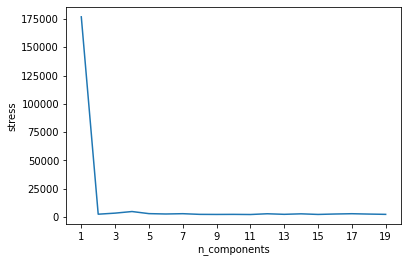

In [ ]:
# Plotting n_components graph
stress, max_range = [], 10

for i in range(1, max_range):
    params = {'dissimilarity': 'euclidean', 'eps': 0.001, 'max_iter': 300, 'metric': True, 
          'n_components': i, 'n_init': 4, 'n_jobs': None, 'random_state': 0, 'verbose': 0}
    mds = MDS()
    mds.set_params(**params)
    X_train = mds.fit_transform(X_train)
    stress.append(mds.stress_)

plt.plot(range(1, max_range), stress)
plt.xticks(range(1, max_range, 2))
plt.xlabel('n_components [dissimilarity = euclidean]')
plt.ylabel('stress')
plt.show()

In [ ]:
mds = MDS()
params = {'dissimilarity': 'euclidean', 'eps': 0.001, 'max_iter': 300, 'metric': True, 
          'n_components': 2, 'n_init': 4, 'n_jobs': None, 'random_state': 0, 'verbose': 0}
mds.set_params(**params)

X_train = mds.fit_transform(X_train)
X_test = mds.fit_transform(X_test)

MDS(random_state=0)

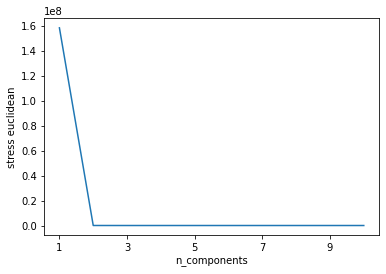

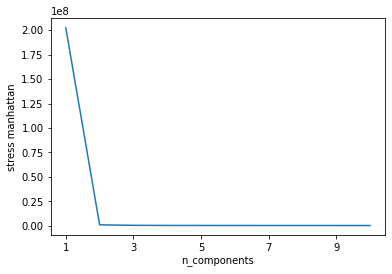

In [ ]:
# Plotting n_components graph
stress1, stress2, max_range = [], [], 11
dist_euclidean = euclidean_distances(X_train)
dist_manhattan = manhattan_distances(X_train)

for i in range(1, max_range):
    params = {'dissimilarity': 'precomputed', 'eps': 0.001, 'max_iter': 300, 'metric': True, 
          'n_components': i, 'n_init': 4, 'n_jobs': None, 'random_state': 0, 'verbose': 0}
    mds1 = MDS()
    mds2 = MDS()
    mds1.set_params(**params)
    mds2.set_params(**params)
    pts1 = mds1.fit_transform(dist_euclidean)
    pts2 = mds2.fit_transform(dist_manhattan)
    stress1.append(mds1.stress_)
    stress2.append(mds2.stress_)

plt.plot(range(1, max_range), stress1)
plt.xticks(range(1, max_range, 2))
plt.xlabel('n_components')
plt.ylabel('stress euclidean')
plt.show()

plt.plot(range(1, max_range), stress2)
plt.xticks(range(1, max_range, 2))
plt.xlabel('n_components')
plt.ylabel('stress manhattan')
plt.show()

In [ ]:
mds = MDS()
params = {'dissimilarity': 'precomputed', 'eps': 0.001, 'max_iter': 300, 'metric': True, 
          'n_components': 2, 'n_init': 4, 'n_jobs': None, 'random_state': 0, 'verbose': 0}
mds.set_params(**params)

X_train = mds.fit_transform(X_train)
X_test = mds.fit_transform(X_test)

MDS(dissimilarity='precomputed', random_state=0)

## Isomap Embedding
[Used for Unsupervised Learning]

>Isomap should be used when there is a non-linear mapping between your higher-dimensional data and your lower-dimensional manifold

>An Awesome Approach to Non-linear Dimensionality Reduction


In [ ]:
isomap = Isomap()
params = {'eigen_solver': 'auto', 'max_iter': None, 'metric': 'minkowski', 'metric_params': None, 'n_components': 2, 
          'n_jobs': -1, 'n_neighbors': 5, 'neighbors_algorithm': 'auto', 'p': 2, 'path_method': 'auto', 'tol': 0}
isomap.set_params(**params)

X_train = isomap.fit_transform(X_train)
X_test = isomap.fit_transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:322: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


## T-distributed Stochastic Neighbor Embedding [t-SNE]

>At a high level, t-SNE constructs a probability distribution for the high-dimensional samples in such a way that similar samples have a high likelihood of being picked while dissimilar points have an extremely small likelihood of being picked. Then, t-SNE defines a similar distribution for the points in the low-dimensional embedding. Finally, t-SNE minimizes the Kullback–Leibler divergence between the two distributions with respect to the locations of the points in the embedding.

>t-SNE takes a high dimensional dataset and reduces it to a low dimensional graph that retains a lot of the original information.

In [ ]:
tsne = TSNE()
params = {'angle': 0.5, 'early_exaggeration': 12.0, 'init': 'warn', 'learning_rate': 'warn', 'method': 'barnes_hut', 
          'metric': 'euclidean', 'min_grad_norm': 1e-07, 'n_components': 2, 'n_iter': 1000, 'n_iter_without_progress': 300, 
          'n_jobs': None, 'perplexity': 30.0, 'random_state': None, 'square_distances': 'legacy', 'verbose': 0}
tsne.set_params(**params)

X_train = tsne.fit_transform(X_train)
X_test = tsne.fit_transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


## Locally Linear Embedding [LLE]
[Used for Unsupervised Learning]

>if you are specifically looking for a non-linear approach, then Locally Linear Embedding (LLE) and Isometric Mapping (Isomap) would be good ones to explore.

In [ ]:
lle = LocallyLinearEmbedding()
params = {'eigen_solver': 'auto', 'hessian_tol': 0.0001, 'max_iter': 100, 'method': 'standard', 
          'modified_tol': 1e-12, 'n_components': 2, 'n_jobs': None, 'n_neighbors': 5, 'neighbors_algorithm': 'auto', 
          'random_state': None, 'reg': 0.001, 'tol': 1e-06}
lle.set_params(**params)

X_train = lle.fit_transform(X_train)
X_test = lle.fit_transform(X_test)

## View the Component with DataFrame

In [ ]:
manifold_2D = pd.DataFrame(X_train, columns=['Component 1', 'Component 2'])
manifold_2D.head()

,Component 1,Component 2
0,-0.086032,0.027163
1,-0.086032,0.060447
2,-0.086032,0.026118
3,-0.086032,0.033980
4,-0.086032,-0.061849


## Model Experiment
---



In [ ]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

## Performance Analysis

In [ ]:
# Confusion Matrix
con_matrix = confusion_matrix(y_test, y_pred)
print("confusion matrix = ", con_matrix)

# Accuracy Score
acc_score = accuracy_score(y_test, y_pred)
print("accuracy score = ", acc_score)

confusion matrix =  [[10  0  0]
 [ 0  0  9]
 [ 0 10  1]]
accuracy score =  0.36666666666666664


## K-fold Cross-Validation

In [ ]:
# Way 1
accuracies = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [ ]:
# Way 2
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
accuracies = cross_val_score(classifier, X, y, cv=cv, n_jobs=-1)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

## Visualising the Test set results

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()